<h1>1. Assimilate the business scenario and articulate testable hypotheses.
</h1>
The business scenario is mainly to understand the impact of moving from standard tiered subscription model to more customised model for different countries. The data science problem here is regression problem (supervised learning) to understand the impact of moving to new model in terms of monthly revenue. The following hypotheses can be made for the above business scenario

a. Null Hypothesis - There is no change in the revenue from the existing and new model for all the countries compared to previous month

b. Hypothesis 1 - The revenue for top 10 countries by usage are not impacted but other countries will see decreased revenues compared to previous month

c. Hypothesis 2 - The revenue for all the countries will increase as conversions will improve due to customized subscription model compared to previous month

d. Hypothesis 3 - The revenue for all the countries will decrease as customized subscription model will reduce revenue per user compared to previous month

<h1>2.Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.
</h1>

In [8]:
import os
import json
import pandas as pd

def make_df_from_folder(folder_path):
    data = []
    for file in os.listdir(folder_path):
        if file.endswith('.json'):
            file_path = os.path.join(folder_path, file)
            try:
                with open(file_path) as f:
                    # Iterate trough list
                    for item in json.load(f):
                        full_data = {
                            'country': item.get('country'),
                            'customer_id': item.get('customer_id'),
                            'invoice': item.get('invoice'),
                            'price': item.get('price'),
                            'stream_id': item.get('stream_id') or item.get('StreamID'),
                            'times_viewed': item.get('times_viewed') or item.get('TimesViewed'),
                            'year': item.get('year'),
                            'month': item.get('month'),
                            'day': item.get('day')
                        }
                        data.append(full_data)
            except json.JSONDecodeError:
                print(f"Error decoding JSON from file: {file_path}")
    df = pd.json_normalize(data)
    df.columns = ['country', 'customer_id', 'invoice', 'price', 'stream_id', 'times_viewed', 'year', 'month', 'day']
    return df

# Example usage
folder_path = 'cs-train'
df = make_df_from_folder(folder_path)
df = df.drop_duplicates()
df.head(10)


,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
0,United Kingdom,13085.0,489434,6.95,85048,12.0,2017,11,28
1,United Kingdom,NaN,489597,8.65,22130,1.0,2017,11,28
2,United Kingdom,NaN,489597,1.70,22132,6.0,2017,11,28
3,United Kingdom,NaN,489597,1.70,22133,4.0,2017,11,28
4,United Kingdom,NaN,489597,0.87,22134,1.0,2017,11,28
5,United Kingdom,NaN,489597,0.87,22135,1.0,2017,11,28
6,United Kingdom,NaN,489597,11.26,22138,3.0,2017,11,28
7,United Kingdom,NaN,489597,11.26,22139,2.0,2017,11,28
8,United Kingdom,NaN,489597,4.30,22141,6.0,2017,11,28
9,United Kingdom,NaN,489597,3.43,22142,2.0,2017,11,28


In [9]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505349 entries, 0 to 815010
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   country       505349 non-null  object 
 1   customer_id   505349 non-null  float64
 2   invoice       505349 non-null  object 
 3   price         505349 non-null  float64
 4   stream_id     505349 non-null  object 
 5   times_viewed  505349 non-null  float64
 6   year          505349 non-null  object 
 7   month         505349 non-null  object 
 8   day           505349 non-null  object 
dtypes: float64(3), object(6)
memory usage: 38.6+ MB


In [10]:
# Deleting by country if it is not in top 10
top_countries = df['country'].value_counts().head(10).index
df = df[df['country'].isin(top_countries)]

In [11]:

# When you compiled the JSON files into a single DataFrame or NumPy array, about how many days did the entire range of dates span

# calculate the range of dates
start_date = df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str)
start_date = pd.to_datetime(start_date)
start_date.min(), start_date.max()

range_of_dates = start_date.max() - start_date.min()
range_of_dates.days


610

<h1>3. Investigate the relationship between the relevant data, the target and the business metric.</h1>

In [12]:
# top 10 countries by revenue
countries = df['country'].values

df1 = pd.crosstab(df['country'], df['year'], values=df['price'], aggfunc='sum', margins=True, margins_name='total')
df1 = df1.sort_values('total', ascending=False)
df1

year,2017,2018,2019,total
country,,,,
total,23075.52,1287942.490,561840.052,1872858.062
United Kingdom,21602.61,1158689.519,495782.332,1676074.461
EIRE,569.66,52627.760,17919.400,71116.820
Germany,153.68,25543.211,13912.260,39609.151
France,325.65,20483.650,12168.890,32978.190
Netherlands,47.68,8407.670,2430.820,10886.170
Portugal,206.64,3039.010,7255.170,10500.820
Belgium,130.00,6654.100,3392.620,10176.720
Switzerland,NaN,5164.520,3326.440,8490.960


In [13]:
# month wise revenue distribution
df2 = pd.crosstab(df['country'], [df['year'], df['month']], values=df['price'], aggfunc='sum', margins=True, margins_name='total')
df2 = df2.sort_values('total', ascending=False)
df2 = df2.head(11)
df2 = df2.transpose()
df2

country            total  United Kingdom      EIRE    Germany    France  \
year  month                                                               
2017  11       23075.520       21602.610    569.66    153.680    325.65   
2018  02       79607.544       68712.974   2513.84   1570.700   1694.52   
      03      139398.551      129530.941   4686.84   2427.520    910.09   
      04      104415.122       97227.111   2672.54   2352.251    679.57   
      05      101860.300       90512.620   3551.72   1469.110   1475.30   
      06      141722.190      132044.930   3044.98   2936.840   1214.97   
      07      104848.050       92210.220   2301.29   4130.510   4750.95   
      08       81770.550       72727.030   2010.63   1535.460   3351.60   
      09      138436.841      123995.451   8338.12   2281.580   1489.05   
      10      211784.660      183383.830  19347.60   3255.900   1964.59   
      11      184098.682      168344.412   4160.20   3583.340   2953.01   
2019  02       63663.830 

<h1>4. Articulate your findings using a deliverable with visualizations.</h1>

<BarContainer object of 11 artists>

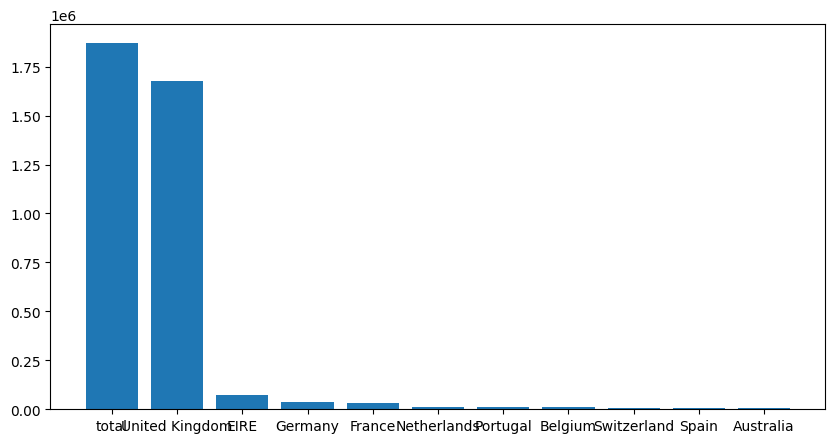

In [15]:
from matplotlib import pyplot as plt

# plot country by revenue
plt.figure(figsize=(10,5))
plt.bar(df1.index, df1['total'])

<Axes: xlabel='year-month', ylabel='country'>

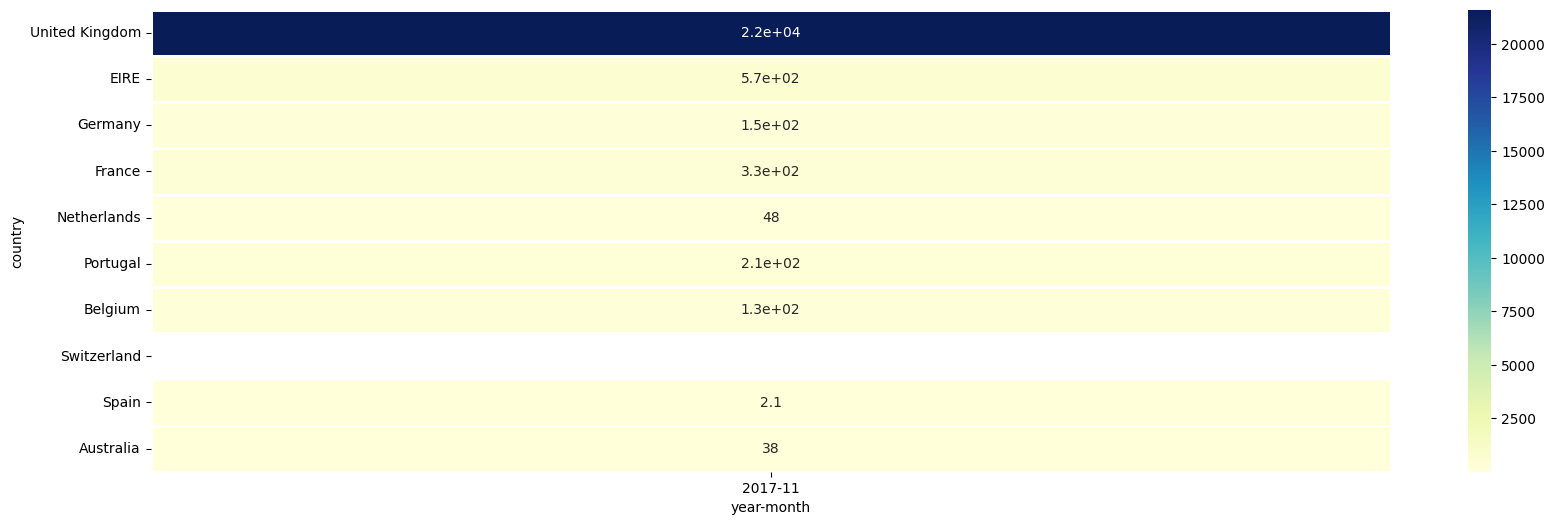

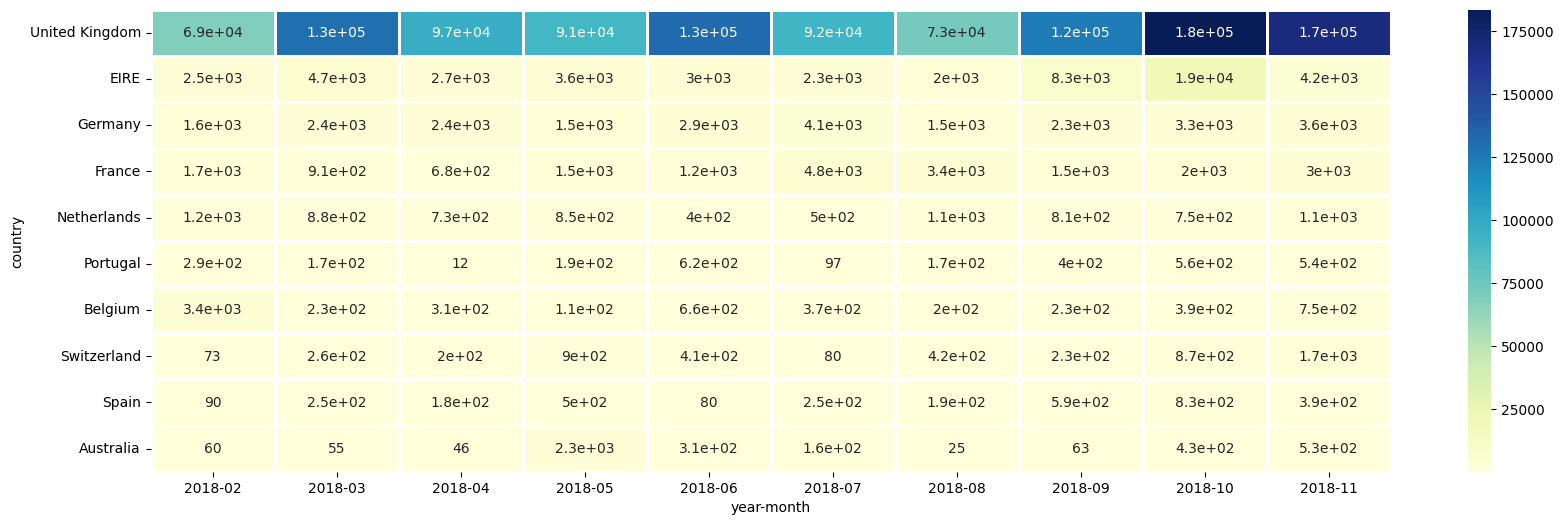

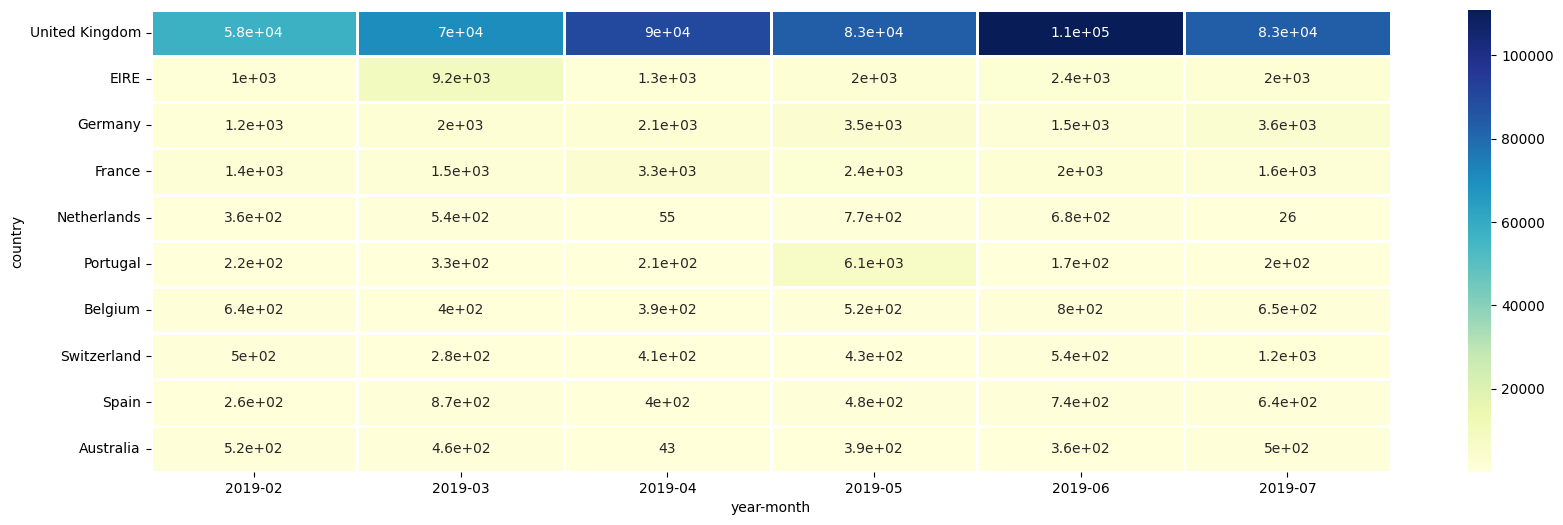

In [16]:
# show the month wise heat map
import seaborn as sns
plt.figure(figsize=(20,6))
df3=df2.transpose()
df3 = df3.drop('total')
sns.heatmap(df3.filter(regex='2017'), cmap="YlGnBu", annot=True, cbar=True, linewidths=1)
plt.figure(figsize=(20,6))
sns.heatmap(df3.filter(regex='2018'), cmap="YlGnBu", annot=True, cbar=True, linewidths=1)
plt.figure(figsize=(20,6))
sns.heatmap(df3.filter(regex='2019'), cmap="YlGnBu", annot=True, cbar=True, linewidths=1)

<Axes: xlabel='date'>

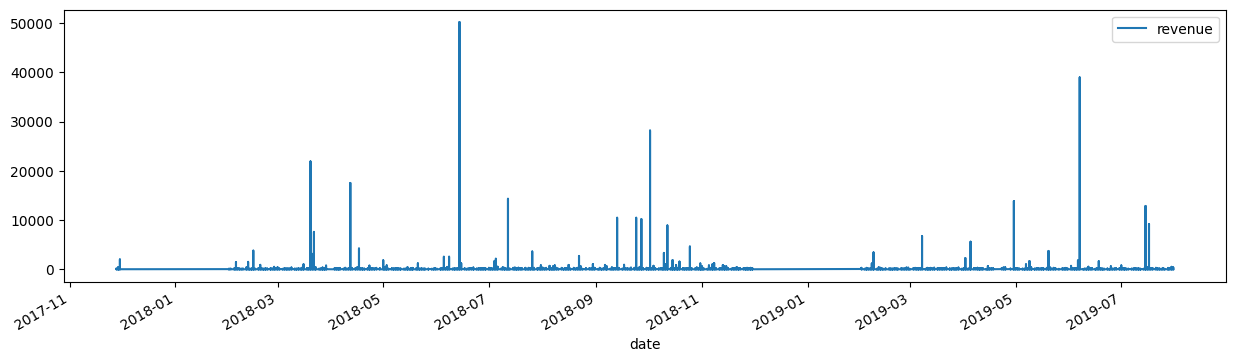

In [19]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['revenue'] = df['price'] * df['times_viewed']
df.plot(x="date", y="revenue", figsize=(15,4))

<h1>Part - 2 Model Building & Selection</h1>

In [27]:
from cslib import *

run_start = time.time() 
data_dir = os.path.join("cs-train")
print("...fetching data")

# Fetching data may take a few seconds
df = fetch_data(data_dir)

# Calculate time taken and display
m, s = divmod(time.time()-run_start,60)
h, m = divmod(m, 60)
print("load time:", "%d:%02d:%02d"%(h, m, s))

# Print the data
df.head()

# Convert the dataframe to a timeseries
ts = convert_to_ts(df)
ts.head()

# Create new features for training
X, y, dates = engineer_features(ts)

# The feature data
X.head()

...fetching data
load time: 0:00:12


,previous_7,previous_14,previous_28,previous_70,previous_year,recent_invoices,recent_views
0,14450.54,14450.54,14450.54,14450.54,0.0,5.928571,537.392857
1,27862.50,27862.50,27862.50,27862.50,0.0,10.310345,1007.103448
2,41152.75,41152.75,41152.75,41152.75,0.0,14.966667,1499.066667
3,50840.03,50840.03,50840.03,50840.03,0.0,18.533333,1916.533333
4,52283.29,52283.29,52283.29,52283.29,0.0,19.600000,2026.966667


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
# Create a train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Create a random forest pipeline
pipe = Pipeline([("scaler", StandardScaler()),
                 ("rf", RandomForestRegressor(n_estimators=20))])

## train on the training data
pipe.fit(X_train, y_train)

## evaluate the model with the test data
y_pred = pipe.predict(X_test)
print(r'R^2=%.2f, MAE=%.2f'%(r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))


R^2=0.95, MAE=7395.40
